In [6]:
# packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma  # ma = masked array
import pandas as pd
import math as mt
import random
from itertools import zip_longest
from collections import Counter
import scipy.stats as stats

In [7]:
network_name = 'Netscience1'

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
with open('/content/drive/My Drive/Colab Notebooks/'+network_name+'.txt', 'r') as file:
    data = file.readlines()
edges = [ tuple(lines.split()[0:2]) for lines in data]
# ---------------------------------------------------------------------------

G = nx.Graph()
G.add_edges_from(edges)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute=None)
print(nx.info(G))
# plt.figure(figsize=(100,100))
# nx.draw_networkx(G)

Name: 
Type: Graph
Number of nodes: 379
Number of edges: 914
Average degree:   4.8232


In [10]:
# from google.colab import drive
# drive.mount("/content/drive")

### F(t) Value (Spreading Ability) --- F(t) = I(t) + R(r)

In [11]:
#@title
def sir(G, plot_total_suscept, plot_total_infect, plot_total_recover, plot_timestamp, steps, node, alpha, beta):
    infected = [node]
    state = [0 for i in range(G.number_of_nodes())]
    state[node] = 1
    
    infect = [node]
    infectnew = [node]
    initial_infect = len(infected)

    total_infect = initial_infect
    total_suscept = G.number_of_nodes() - initial_infect
    total_recover = 0
    timestamp = 0
    ##### initialize
    plot_total_infect.append(total_infect)
    plot_total_suscept.append(total_suscept)
    plot_total_recover.append(total_recover)
    plot_timestamp.append(timestamp)
    
    total_infectnew = len(infected)
    total_susceptnew = G.number_of_nodes() - initial_infect;
    total_recovernew = 0
    
    while timestamp < steps:
        for inode in infect:
            if G.has_node(inode):
                for v in G.neighbors(inode):         # susceptible=0, infected=1, recovered=2
                    if state[v] == 0:
                        if random.randint(1, 100) <= alpha:
                            state[v] = 1
                            total_infectnew += 1
                            infectnew.append(v)
                            total_susceptnew -= 1

                    elif state[v] == 1:
                        if random.randint(1, 100) <= beta:
                            state[v] = 2
                            total_infectnew -= 1
                            infectnew.remove(v)
                            total_recovernew += 1
        timestamp += 1
        
        plot_total_infect.append(total_infectnew)
        plot_total_suscept.append(total_susceptnew)
        plot_total_recover.append(total_recovernew + total_infectnew)
        plot_timestamp.append(timestamp)
        
        total_infect, total_suscept, total_recover = 0, 0, 0
        infect = infectnew[:]
        total_infect = total_infectnew
        total_suscept = total_susceptnew
# =====================================================================
def spreading_ability(G, alpha, beta, iteration):
    F_t = []
    
    S, I, R, T = [], [], [], []
    for j in G.nodes:
        finalS, finalI, finalR, finalTime = [],[],[],[]
        sir(G, finalS, finalI, finalR, finalTime, iteration, j, alpha, beta)
        S.append(finalS)
        I.append(finalI)
        R.append(finalR)
        T.append(finalTime)
        
    for i in range(len(S)):
        F_t.append( I[i][-1] + R[i][-1] )
    return F_t
# =================================================================



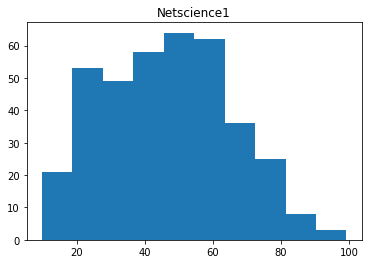

In [12]:
alpha, beta, iteration = 30, 100, 100  # infection rate, recovery rate, iteration

# Ft is calculated for taking aberaging of 100 independent iteration
F_t1 = list(np.mean( np.array( [spreading_ability(G, alpha, beta, iteration) for _ in range(100)] ), axis=0 ))

plt.hist(F_t1);
plt.title(network_name);

In [13]:
ft = sorted(zip(G.nodes(), F_t1), key=lambda t:t[1], reverse=True)
ft = pd.DataFrame(ft, columns=['Node', 'F(t)'])
# ft.head()

### Degree Centrality   $C_d(V) = \sum_{}\frac{A_{uv}}{(n-1)}$ for u=1 to n


In [14]:
#@title
# # Degree Centrality
# try:
#     d = pd.read_csv(network_name+'_dc.csv')
#     d_cen_dic = dict(d.values.tolist())
    
#     d = sorted(d_cen_dic.items(), key=lambda t:t[1], reverse=True)
#     d = pd.DataFrame(d, columns=['Node', 'DC_Rank'])
    
# except:
#     d_cen_dic = nx.degree_centrality(G)

#     pd.DataFrame(list(d_cen_dic.items()), columns=['Node', 'DC_Rank']).to_csv(network_name+'_dc.csv', index=False)
    
#     d = sorted(d_cen_dic.items(), key=lambda t:t[1], reverse=True)
#     d = pd.DataFrame(d, columns=['Node', 'DC_Rank'])
# # d.head()

In [15]:
#@title
# Degree only
try:
    d = pd.read_csv(network_name+'_degree.csv')
    d_cen_dic = dict(d.values.tolist())
    
    d = sorted(d_cen_dic.items(), key=lambda t:t[1], reverse=True)
    d = pd.DataFrame(d, columns=['Node', 'DC_Rank'])
    
except:
    d_cen_dic = dict(nx.degree(G))

    pd.DataFrame(list(d_cen_dic.items()), columns=['Node', 'DC_Rank']).to_csv(network_name+'_degree.csv', index=False)
    
    d = sorted(d_cen_dic.items(), key=lambda t:t[1], reverse=True)
    d = pd.DataFrame(d, columns=['Node', 'DC_Rank'])
# d.head()

### Closeness Centrality $C_c = \frac{1}{sum\ of\ shortest\ distance\ of\ node\ c\ to\ all\ other\ nodes}$

In [16]:
#@title
try:
    c = pd.read_csv(network_name+'_cc.csv')
    c_cen_dic = dict(c.values.tolist())
    
    c = sorted(c_cen_dic.items(), key=lambda t:t[1], reverse=True)
    c = pd.DataFrame(c, columns=['Node', 'CC_Rank'])

except:
    c_cen_dic = nx.closeness_centrality(G)
    pd.DataFrame(list(c_cen_dic.items()), columns=['Node', 'CC_Rank']).to_csv(network_name+'_cc.csv', index=False)
    
    c = sorted(c_cen_dic.items(), key=lambda t:t[1], reverse=True)
    c = pd.DataFrame(c, columns=['Node', 'CC_Rank'])
# c.head()

### Betweenness Centrality $ B_c = \sum_{u,v}(\frac{\sigma_{st}(V)}{\sigma_{st}})\ such\ that\ s\ne t \ne v$


In [17]:
#@title
try:
    b = pd.read_csv(network_name+'_bc.csv')
    b_cen_dic = dict(b.values.tolist())
    
    b = sorted(b_cen_dic.items(), key=lambda t:t[1], reverse=True)
    b = pd.DataFrame(b, columns=['Node', 'BC_Rank'])
    
except:
    b_cen_dic = nx.betweenness_centrality(G)
    pd.DataFrame(list(b_cen_dic.items()), columns=['Node', 'BC_Rank']).to_csv(network_name+'_bc.csv', index=False)
    
    b = sorted(b_cen_dic.items(), key=lambda t:t[1], reverse=True)
    b = pd.DataFrame(b, columns=['Node', 'BC_Rank'])
# b.head()

#### Combining $D_c, C_c, B_c$ to form a matrix and Normalizing

In [18]:
d_cen = list(d_cen_dic.values())
c_cen = list(c_cen_dic.values())
b_cen = list(b_cen_dic.values())
Y_D = np.array([d_cen, b_cen, c_cen]).transpose()

# Normalizing cetnrality matrix
Y_D_normalized = Y_D / ( np.sum(Y_D**2, axis=0)**(0.5) )

#### Combining $D_c, C_c, B_c, and\ F(t)$ to Form a Matrix

In [19]:
mat = np.array([d_cen, b_cen, c_cen, F_t1]).transpose()
pd.DataFrame(mat, columns=['DC','BC','CC','F(t)']).head()

,DC,BC,CC,F(t)
0,2.0,0.000000,0.174919,55.61
1,10.0,0.091461,0.211765,87.96
2,2.0,0.000000,0.174919,52.80
3,34.0,0.152056,0.213318,78.83
4,27.0,0.250628,0.229648,84.18


### Dynamic Weight Using W-TOPSIS

In [20]:
def dynamic_weight_TOPSIS(mat):
    D = mat    
    R = D / np.sum(D, axis=0)
    V = 1 / abs( R[:, 0:-1] - R[:, -1:] )
    e = V.sum(axis=0)
    w = e / e.sum()
    return w
    
w_topsis = dynamic_weight_TOPSIS(mat)
print("Dynamic weight using Weighted TOPSIS: ", w_topsis)

Dynamic weight using Weighted TOPSIS:  [0.44872914 0.05050726 0.50076361]


### Ranking using W-TOPSIS

In [21]:
def rank_using_W_TOPSIS(mat, w_topsis):
    M = mat[: , 0:-1]            #M is a submatrix of matrix D 
    # Normalizing M
    M = M / ( np.sum(M**2, axis=0)**(0.5) )
    B = M * w_topsis

    A_plus = np.max(B, axis=0)
    A_minus = np.min(B, axis=0)

    S_plus = (np.sum((B-A_plus)**2, axis=1))**(0.5)
    S_minus = (np.sum((B-A_minus)**2, axis=1))**(0.5)

    return S_minus/(S_minus + S_plus)
C = rank_using_W_TOPSIS(mat, w_topsis)
# print(C)

In [22]:
x_topsis_dict = dict(zip(G.nodes, C))
y_topsis = sorted(x_topsis_dict.items(), key=lambda t:t[1], reverse=True)
y_topsis = pd.DataFrame(y_topsis, columns=['Node', 'W-TOPSIS_Rank'])
# y_topsis.head(10)

### D_WSM  (W-TOPSIS and WSM)
###### here dynamic weight is calculated by W-TOPSIS and then WSM applied

In [23]:
Y_D_normalized_D_WSM = Y_D_normalized * w_topsis
x_D_WSM = Y_D_normalized_D_WSM.sum(axis=1)
x_D_WSM_dict = dict(zip(G.nodes, x_D_WSM))

y_D_WSM = sorted(x_D_WSM_dict.items(), key=lambda t:t[1], reverse=True)
y_D_WSM = pd.DataFrame(y_D_WSM, columns=['Node', 'D_WSM_Rank'])
# y_D_WSM.head(10)

## Dynamic Weight using GRA
### (1) Due to differences of measurement units, it is necessary to process each attribute into a comparability sequence. $ \ \ \ \ y_{ij} = \frac{e_{ij} - \min_{\forall i} e_{ij}} {\sum_{k=1}^N e_{kj}}$ 

## $(2) \ \ \ \ r(y_{i0}, y_{ij}) = \frac{\min_{\forall i}\min_{\forall j}|y_{i0} - y_{ij}|\ +\ \rho\max_{\forall i}\max_{\forall j}|y_{i0} - y_{ij}|}{|y_{i0} - y_{ij}|\ +\ \rho \max_{\forall i}\max_{\forall j}|y_{i0} - y_{ij}|}$
### $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ i = 1,2,...,N; \ \ \ \ j = 1,2,...,M,$

###     $\ \ \ \ \ \ \ R(Y_0, Y_j) = \frac{1}{N}\sum_{i=1}^N r(y_{0j}, y_{ij}),\ \ \ \ \  j = 1,2,...,M,$
### $\ \ \ \ \ \ \ \ \ \       where\ \rho\ is\ the\ distinguishing\ coefficient,\ \rho \in [0, 1]$

### $(3) \ \ \ \ w_j = \frac{R(Y_{M+1}, Y_j)}     { \sum_{k=1}^M  R(Y_{M+1}, Y_j) },   \ \ \  j = 1, 2, ... M$

In [24]:
def dynamic_weight_GRA(mat):    # mat = [DC, BC, CC, F(t)]
    E = mat
    Y = (E - E.min(axis=0)) / np.sum(E, axis=0)
#     Y = (E - E.min(axis=0)) / (E.max(axis=0) - E.min(axis=0))
#     Y = mat
    roh = 0.5
    M = np.absolute( Y[ : , 0:-1] - Y[ : , -1:] )
    r = ( M.min() + roh*M.max() ) / ( M + roh*Y.max() )
    R = np.sum(r, axis=0) / len(mat)
    w = R / R.sum()
    
#     print(Y[:5, :])
    
    return w
w_gra = dynamic_weight_GRA(mat)
print("Dynamic weight using GRA: ", w_gra)
print("\nDynamic weight using Weighted TOPSIS: ", w_topsis)

Dynamic weight using GRA:  [0.33540501 0.32466428 0.33993071]

Dynamic weight using Weighted TOPSIS:  [0.44872914 0.05050726 0.50076361]


In [25]:
# # implementation of Yang Paper example,    Expected = [0.32689583 0.37749351 0.29561067]
# mat1 = np.array([[4,  0.1667,  0.55,  2.5475],
#                  [1,  0.1,     0,     1.6770],
#                  [2,  0.1111,  0.05,  2.0197],
#                  [2,  0.125,   0.1,   2.0616],
#                  [3,  0.1429,  0.2,   2.3686],
#                  [2,  0.125,   0,     2.1159]])

# w_gra = dynamic_weight_GRA(mat1)
# print("Dynamic weight using GRA: ", w_gra) # Output = [0.32689583 0.37749351 0.29561067]

## GRA-WSM

In [26]:
# WSM is applied here
Y_D_normalized_gra = Y_D_normalized * w_gra
x_gra = Y_D_normalized_gra.sum(axis=1)
x_gra_dict = dict(zip(G.nodes, x_gra))

In [27]:
y_gra=sorted(x_gra_dict.items(), key=lambda t:t[1], reverse=True)
y_gra=pd.DataFrame(y_gra, columns=['Node', 'GRA_WSM_Rank'])
# y_gra.head(10)

In [28]:
pd.set_option('display.max_columns', None)
p = 10
line = pd.DataFrame(['|']*p, columns=['|'])
result = pd.concat([line,d.head(p),line, c.head(p),line, b.head(p),line,y_D_WSM.head(p),line, y_topsis.head(p),line, y_gra.head(p),line, ft.head(p)], axis=1, sort=False)
result

,|,Node,DC_Rank,|,Node,CC_Rank,|,Node,BC_Rank,|,Node,D_WSM_Rank,|,Node,W-TOPSIS_Rank,|,Node,GRA_WSM_Rank,|,Node,F(t)
0,|,3,34,|,58,0.256619,|,58,0.397184,|,3,0.165949,|,3,0.894244,|,58,0.237737,|,58,99.25
1,|,4,27,|,119,0.249012,|,106,0.345147,|,58,0.159613,|,58,0.796704,|,106,0.185583,|,44,97.51
2,|,58,27,|,106,0.247059,|,189,0.286020,|,4,0.147730,|,4,0.783901,|,4,0.184462,|,106,95.38
3,|,5,21,|,44,0.243087,|,119,0.270163,|,119,0.114606,|,5,0.587891,|,3,0.168203,|,1,87.96
4,|,72,19,|,187,0.232902,|,72,0.255428,|,72,0.112087,|,72,0.549437,|,119,0.165459,|,49,87.47
5,|,219,18,|,107,0.230628,|,4,0.250628,|,106,0.110926,|,119,0.507608,|,72,0.159713,|,136,85.13
6,|,119,17,|,4,0.229648,|,44,0.231654,|,5,0.108031,|,219,0.506175,|,189,0.159266,|,4,84.18
7,|,13,16,|,6,0.222353,|,187,0.221549,|,44,0.100539,|,106,0.458593,|,44,0.143268,|,187,83.78
8,|,7,15,|,130,0.220280,|,6,0.174878,|,189,0.099401,|,13,0.452520,|,187,0.133212,|,119,82.79
9,|,106,15,|,135,0.219895,|,178,0.174686,|,219,0.097677,|,142,0.425535,|,107,0.116052,|,6,81.53


In [29]:
common_node1 = list(set(y_gra.head(p)['Node']) - set(y_topsis.head(p)['Node']))
common_node2 = list(set(y_topsis.head(p)['Node']) - set(y_gra.head(p)['Node']))
print("Node present in GRA-WSM but not in W-TOPSIS: ", common_node1 )
print("Node present in W-TOPSIS but not in GRA-WSM: ", common_node2 )

Node present in GRA-WSM but not in W-TOPSIS:  [107, 44, 187, 189]
Node present in W-TOPSIS but not in GRA-WSM:  [13, 219, 5, 142]


## SIR Test

In [30]:
def sir_1(G, H, plot_total_infect, plot_total_suscept, plot_total_recover, plot_timestamp, steps, node, L=alpha, A=beta):
    nnodes = G.number_of_nodes()

    infected= [node]
    state = [0 for i in range(0, nnodes)]
    infect = []
    infectnew = []
    initial_infect = len(infected)

    for i in list(infected):
        state[i] = 1
        infect.append(i)
        infectnew.append(i)

    total_infect = initial_infect
    total_suscept = H.number_of_nodes() - initial_infect
    total_recover=0
    timestamp = 0
    ##### initialize
    plot_timestamp.append(timestamp)
    plot_total_infect.append(total_infect)
    plot_total_suscept.append(total_suscept)
    total_infectnew = len(infected)
    plot_total_recover.append(total_recover)
    total_susceptnew = H.number_of_nodes() - initial_infect
    total_recovernew=0

    while timestamp < steps:
        for i in infect:
            if H.has_node(i):
                for v in H.neighbors(i):
                    if (state[v] == 0):
                        P = random.randint(1, 100)
                        if (P <= L):
                            state[v] = 1
                            total_infectnew += 1
                            infectnew.append(v)
                            total_susceptnew -= 1

                    elif (state[v] == 1):
                        P = random.randint(1, 100)
                        if (P <= A):
                            state[v] = 2
                            total_infectnew -= 1
                            infectnew.remove(v)
                            total_recovernew += 1

        timestamp += 1
        plot_timestamp.append(timestamp)
        plot_total_infect.append(total_infectnew)
        plot_total_suscept.append(total_susceptnew)
        plot_total_recover.append(total_recovernew + total_infectnew)
        del infect[:]
        total_infect = 0
        total_suscept = 0
        total_recover = 0
        infect = infectnew[:]
        total_infect = total_infectnew
        total_suscept = total_susceptnew

# ==================================================================================================
def s_i_r_t(node, G, steps, alpha, beta):
    nnodes = G.number_of_nodes()
    S, I, R, T = [],[],[],[]
    for j in range(0, 100):
        finalS, finalI, finalR, finalTime = [],[],[],[]
        sir_1(G, G, finalI, finalS, finalR, finalTime, steps, node, alpha, beta)
        S.append(finalS)
        I.append(finalI)
        R.append(finalR)
        T.append(finalTime)
        
    finalS = [np.ma.average(ma.masked_values(temp_list, None)) for temp_list in zip_longest(*S)]
    finalI = [np.ma.average(ma.masked_values(temp_list, None)) for temp_list in zip_longest(*I)]
    finalR = [np.ma.average(ma.masked_values(temp_list, None)) for temp_list in zip_longest(*R)]
    finalTime = [np.ma.average(ma.masked_values(temp_list, None)) for temp_list in zip_longest(*T)]

    return [finalS, finalI, finalR, finalTime]

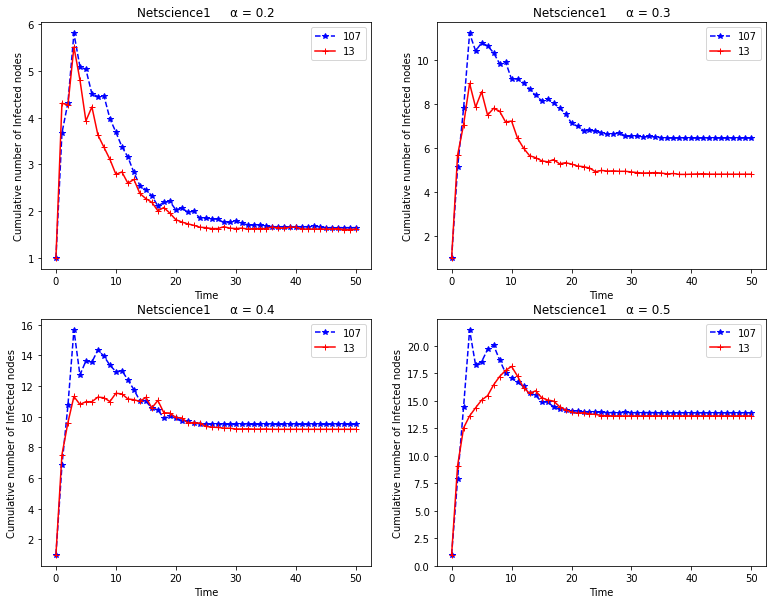

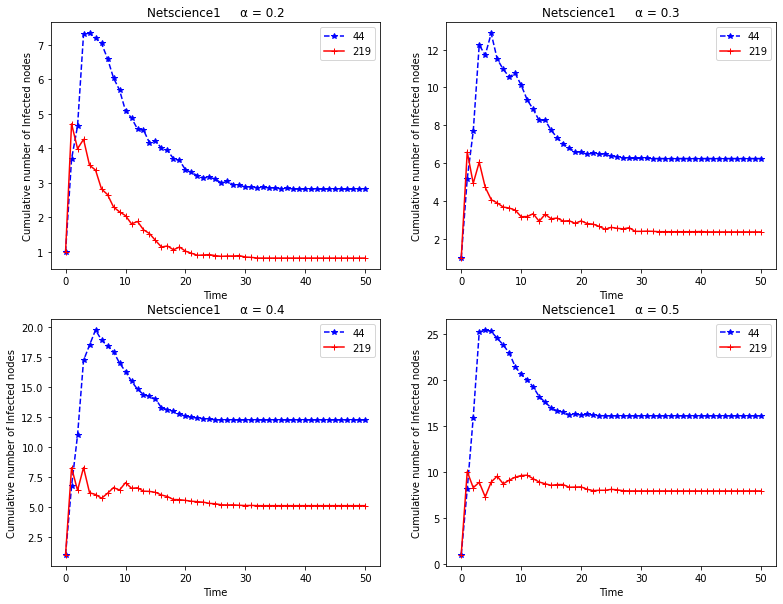

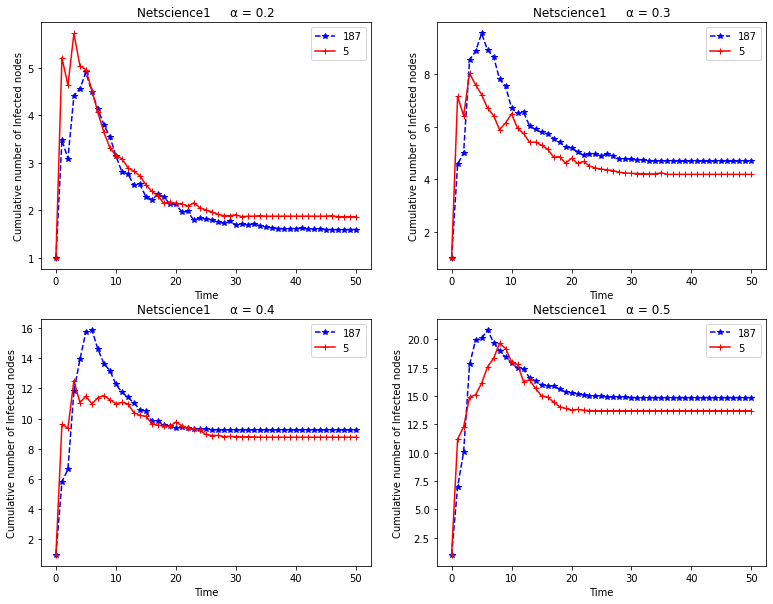

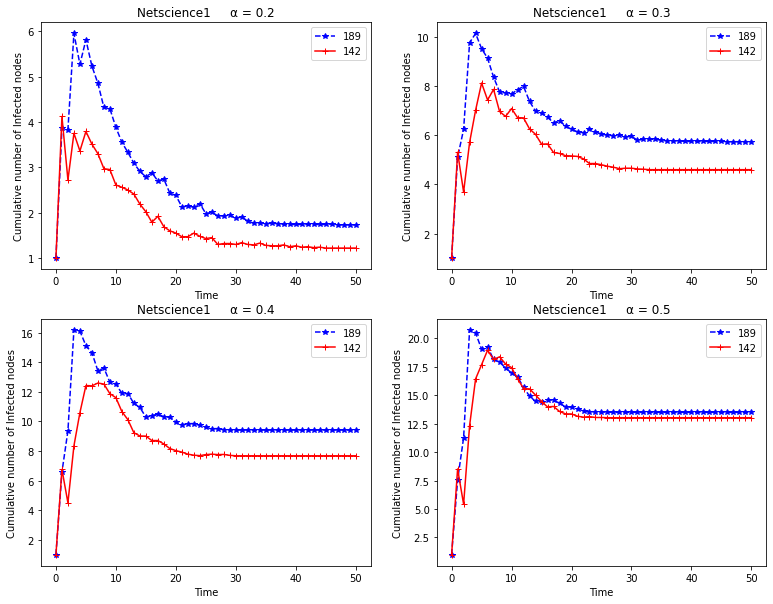

In [31]:
def plot_sir_of_nodes(node1, node2, alpha, beta, iteration):
    fig, axes = plt.subplots(2,2, figsize=(13,10))
    j=0
    for i in alpha:

        S_I_R_T = s_i_r_t(node1, G, iteration, i, beta)  #(node, G, steps)
        u = S_I_R_T[1]  # no of infected nodes
        v = list(map(int, S_I_R_T[3]))  # time (1 to 20)
        
        S_I_R_T = s_i_r_t(node2, G, iteration, i, beta)
        m = S_I_R_T[1]  # no of infected nodes
        n = list(map(int, S_I_R_T[3]))  # time (1 to 20)

    #     plt.figure(figsize=(7,5))
        axes[j//2][j%2].plot(v, u, 'b*--', label=node1)
        axes[j//2][j%2].plot(n, m, 'r-+', label=node2)

        axes[j//2][j%2].set_xlabel('Time')
        axes[j//2][j%2].set_ylabel('Cumulative number of Infected nodes')
        axes[j//2][j%2].title.set_text(network_name + '     ' + '\u03B1 = ' + str(i/100))
#         axes[j//2][j%2].set_xticks(v)
        
        axes[j//2][j%2].legend()
        j+=1
# ===========================================================================
for i in range(len(common_node1)):
    node1 = common_node1[i]
    node2 = common_node2[i]
#   ---------------------------------------------------------------
    alpha, beta, iteration = [20, 30, 40, 50], 100, 50

    plot_sir_of_nodes(node1, node2, alpha, beta, iteration)

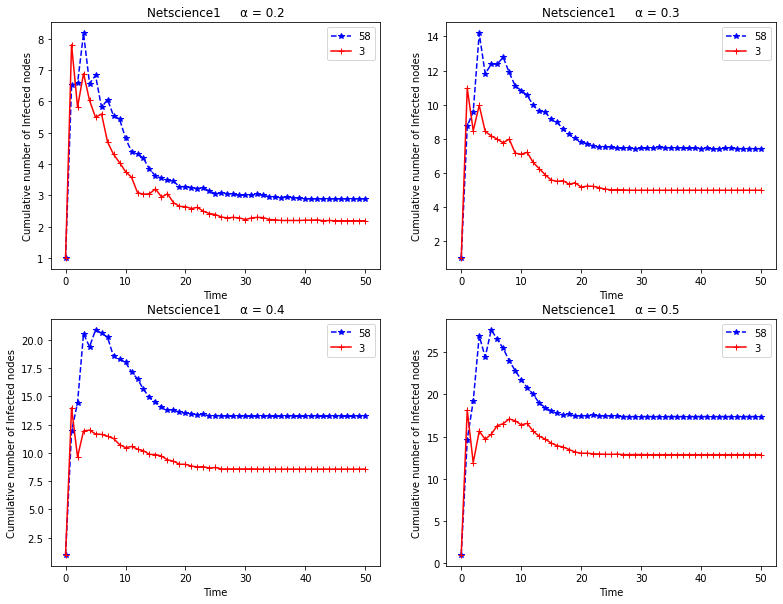

In [32]:
node1 = 58
node2 = 3
# --------------------------------------------------------------------------
alpha, beta, iteration = [20, 30, 40, 50], 100, 50

plot_sir_of_nodes(node1, node2, alpha, beta, iteration)

# Kendle Tau   $\tau = \frac{N_c - N_d}{n(n-1)/2}$ where
$N_c$ = Concordant pairs<br>
$N_d$ = Concordant pairs<br>
$n$ = number of nodes

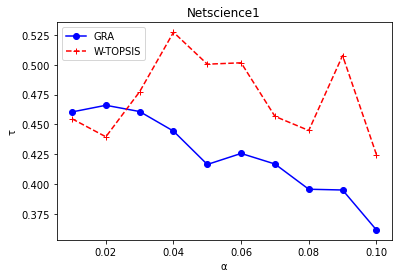

In [33]:
# Kendal Tau using spreadig_ability        alpha = [0.01 to 0.1]

alpha, beta, iteration = np.linspace(0.01, 0.1, 10), 100, 100

T1, T2, T3 = [], [], []        # tau for GRA, W_TOPSIS and D-WSM respectively
for i in alpha:
    F_t2 = list(np.mean( np.array( [spreading_ability(G, i*100, beta, iteration) for _ in range(100)] ), axis=0 ))
    
    mat = np.array([d_cen, b_cen, c_cen, F_t2]).transpose()
    # GRA-WSM (GRA + WSM)
    w_gra = dynamic_weight_GRA(mat)  # dunamic weight using GRA
    Y_D_normalized_gra = Y_D_normalized * w_gra
    x_gra = Y_D_normalized_gra.sum(axis=1)  # GRA Rank
    tau, p_value = stats.kendalltau(F_t2, x_gra)
    T1.append(tau)
    
    # W-TOPSIS
    w_topsis= dynamic_weight_TOPSIS(mat)  # dynamic weight using W-TOPSIS
    C = rank_using_W_TOPSIS(mat, w_topsis)  # W-TOPSIS rank
    tau, p_value = stats.kendalltau(F_t2, C)
    T2.append(tau)
    
    # D-WSM  (TOPSIS + WSM)l
    Y_D_normalized_D_WSM = Y_D_normalized * w_topsis
    x_D_WSM = Y_D_normalized_D_WSM.sum(axis=1)
    tau, p_value = stats.kendalltau(F_t2, x_D_WSM)
    T3.append(tau)

plt.plot(alpha, T1, marker='o', color='b', label='GRA')
plt.plot(alpha, T2, marker='+', color='r', linestyle='--', label='W-TOPSIS')
# plt.plot(alpha, T3, marker='.', label='D-WSM')

plt.xlabel('\u03B1')
plt.ylabel('\u03C4')
plt.title(network_name)
# plt.xticks(alpha)
plt.legend()
plt.show()